# Sentiment Analysis

Before we kick off the part-3 of our NLP-project comprising Sentiment Analyses, we want to give some key facts about the used library: `spaCy`

**spaCy** is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

**spaCy Features:**
- **Preprocessing**: tokenisation, sentence segmentation, lemmatisation, stopwords
- **Linguistic features**: part of speech tags, dependency parsing, named entity recogniser
- **Visualisers** for dependency trees and named entity recogniser
- Pre-trained **word vectors** and models
- **Flexibility**: can augment or replace any pipeline component or add new components such as TextCategorizer.
- Transfer learning with BERT-style pretraining

**Programming Goals:**
- Build process pipeline with spaCy
- Build dataframe containing several tags per token
- Use spaCy statistical models to analyze text
- Use spaCy TextBlob to enable sentiment analysis
- Create Word vectors and similarity

**Literature Review Goals**

- Create Word vectors and similarity for each abstract
- Combine similarity scores with polarity for every Noun
- Count how often each Noun has negative/positive polarity


## 1) Data Manipulation using spaCy

First, as always, we must import the dataset and get familiar with it.

In [2]:
# Load pandas library
import pandas as pd

# Load df comprising research articles and more
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio_Projects/03_PhD_Analysen/04_NLP_CG_VBM/Rohdaten_0603.csv", sep = ";", index_col = 0, error_bad_lines=False)

# View first rows
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Journal,Title,Year,Abstract
No.,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a..."
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...


In [3]:
# Subset df:: No. Journal and Abstract
df = df.reindex(columns=["Journal", "Title", "Year", "Abstract"])

# View first rows
df.head()

,Journal,Title,Year,Abstract
No.,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a..."
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...


In [4]:
# Print number of Journals
print(df["Journal"].nunique())

# Print number of articles per journal
df["Journal"].value_counts()


29


Corporate Governance: An International Review         123
Journal of Management and Governance                   78
International Journal of Disclosure And Governance     39
Journal of Management                                  35
Strategic Management Journal                           35
British Journal of Management                          32
Managerial and Decision Economics                      27
Journal of Management Studies                          19
BRQ Business Research Quarterly                        17
Review of Managerial Science                           15
European Management Review                             13
International Studies of Management & Organization     12
International Journal of Management Reviews            12
Journal of Economics and Finance                       11
Journal of Business Economics and Management           11
Cogent Business & Management                            8
Journal of International Business Studies               6
Journal of Gen

In [5]:
print(f"In total, there are {df.shape[0]} observations and {df.shape[1]} attributes in the dataframe.\n")


In total, there are 530 observations and 4 attributes in the dataframe.



### 1a) Create a spaCy-document

A spaCy document (`nlp()`) is a rich collection of tokens that have been annotated with many attributes including parts of speech, lemmas, dependencies, and named entities.
Therefore, we call `nlp()` on abstracts to return a processed Doc for each abstract. In this Doc, every abstract is now a seperate abstract in a seperate row


In [1]:
# Import spaCy library and pipeline
import spacy

# install spacy pipeline
#!pip install python -m spacy download en

# Load pipeline
nlp = spacy.load("en_core_web_sm")


In [6]:
# Create new column "nlp_abstract"
df["nlp_abstract"] = df["Abstract"]

# Create spaCy-document
df["nlp_abstract"] = [nlp(abstract) for abstract in df["Abstract"]]

# View first rows
df.sample(3)

,Journal,Title,Year,Abstract,nlp_abstract
No.,,,,,
174,Corporate Governance: An International Review,Corporate governance and correlation in corpor...,2019,This study examines the effect of weak corpora...,"(This, study, examines, the, effect, of, weak,..."
333,European Management Review,CEO Shareholdings and Earnings Manipulation: A...,2016,Empirical findings on the relationship between...,"(Empirical, findings, on, the, relationship, b..."
275,Corporate Governance: An International Review,Does board gender diversity influence voluntar...,2019,"Using a multitheoretic view of boards, this st...","(Using, a, multitheoretic, view, of, boards, ,..."


In [7]:
# Compare formats of the two columns nlp_abstract and Abstract
print(type(df["nlp_abstract"]))
print(type(df["Abstract"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### 1b) Analyzing Number of Tokens

We want to quantify the abstracts based on the number of tokens.

In [8]:
# Aggregate number of tokens for each abstract
df["num_tokens"] = [len(token) for token in df["nlp_abstract"]]

# View first rows
df.head()


,Journal,Title,Year,Abstract,nlp_abstract,num_tokens
No.,,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,"(Sustainability, -, oriented, CEO, compensatio...",203
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...","(To, address, global, sustainability, challeng...",210
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,"(The, main, purpose, of, this, study, is, to, ...",119
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,"(The, study, examines, the, relationship, betw...",264
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,"(This, study, focuses, on, whether, board, ind...",90


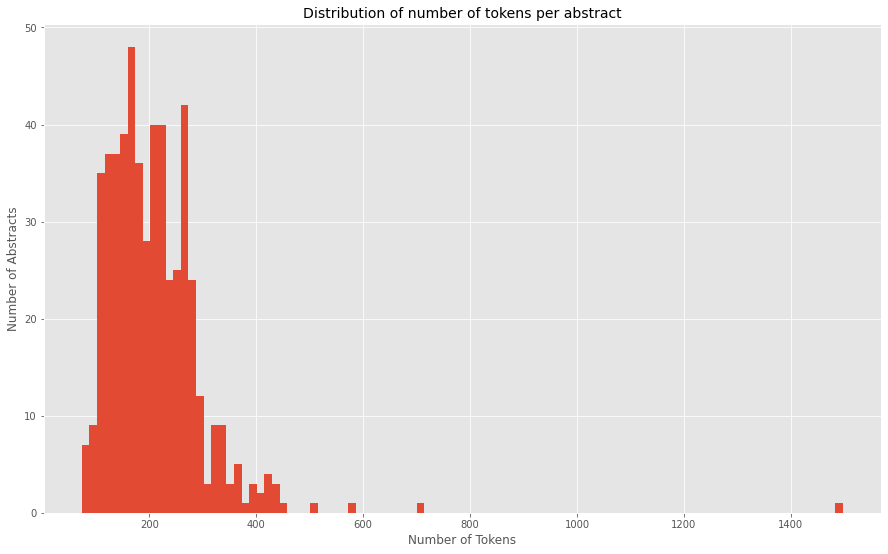

In [9]:
# Visually depict the number of tokens
# Import matplotlib library
import matplotlib.pyplot as plt

# Setup figure layout
plt.style.use("ggplot")

# Plot histogram of df["Num_Tokens"]
df["num_tokens"].plot(kind="hist", bins = 100, figsize = (15, 9));

# Add Annotations
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Abstracts")
plt.title("Distribution of number of tokens per abstract", size = 14);

### 1c) Tokenization

In this third step, we want to create a list of tokens for each abstract. Thus, we apply spaCy's `token.text` attribute for each token in each abstract
with **`token.text`** for each abstract

In [10]:
# Create token_text column
from spacy.lang.en.stop_words import STOP_WORDS
df["token_text"] = df["Abstract"].apply(lambda x: [y.text for y in  nlp(x) if not y.is_stop])
df.sample(3)

,Journal,Title,Year,Abstract,nlp_abstract,num_tokens,token_text
No.,,,,,,,
200,Corporate Governance: An International Review,"Weathering the Storm: Family Ownership, Govern...",2015,Considering the recent financial and economic ...,"(Considering, the, recent, financial, and, eco...",278,"[Considering, recent, financial, economic, cri..."
526,International Journal of the Economics of Busi...,Board of Director Quality and Firm Performance,2011,This paper aims to shed light on the relations...,"(This, paper, aims, to, shed, light, on, the, ...",77,"[paper, aims, shed, light, relationship, quali..."
325,European Management Review,"The Effects of Directors’ Exploratory, Transfo...",2018,While directors' knowledge represents a crucia...,"(While, directors, ', knowledge, represents, a...",139,"[directors, ', knowledge, represents, crucial,..."


### 1d) Lowercasing

We remove further noise of the text corpus by lowercasing each and every token using **`token.lower_`**.

In [11]:
# Lowercasing every token
df["token_lower"] = df["Abstract"].apply(lambda x: [y.lower_ for y in  nlp(x) if not y.is_stop])

# View the first rows
df.sample(3)

,Journal,Title,Year,Abstract,nlp_abstract,num_tokens,token_text,token_lower
No.,,,,,,,,
516,Journal of Business Economics and Management,"Determination of environmental, social and cor...",2012,The article is concerned with determination of...,"(The, article, is, concerned, with, determinat...",203,"[article, concerned, determination, environmen...","[article, concerned, determination, environmen..."
80,Journal of Management and Governance,Rethinking board diversity with the behavioura...,2017,In this study a cross-theoretical hybridizatio...,"(In, this, study, a, cross, -, theoretical, hy...",271,"[study, cross, -, theoretical, hybridization, ...","[study, cross, -, theoretical, hybridization, ..."
78,Journal of Management and Governance,Ownership structure and investment-cash flow s...,2018,This study investigates the effect of ownershi...,"(This, study, investigates, the, effect, of, o...",153,"[study, investigates, effect, ownership, struc...","[study, investigates, effect, ownership, struc..."


### 1e) Lemmatization 

We remove noise by lemmatizing tokens using **`token.lemma_`**.

In [12]:
# Lemmatize tokens
df["token_lemma"] = df["Abstract"].apply(lambda x: [y.lemma_ for y in  nlp(x) if not y.is_stop])

# View first rows
df.sample(3)

,Journal,Title,Year,Abstract,nlp_abstract,num_tokens,token_text,token_lower,token_lemma
No.,,,,,,,,,
466,Business Perspectives and Research,Does Presence of Foreign Directors Make a Diff...,2020,In their pursuit to garner resources and suppo...,"(In, their, pursuit, to, garner, resources, an...",224,"[pursuit, garner, resources, support, IPO, ,, ...","[pursuit, garner, resources, support, ipo, ,, ...","[pursuit, garner, resource, support, ipo, ,, i..."
342,International Journal of Management Reviews,Small Is Beautiful or Big Is Better: How Much ...,2020,Drawing on a national survey – the 2011 Britis...,"(Drawing, on, a, national, survey, –, the, 201...",159,"[Drawing, national, survey, –, 2011, British, ...","[drawing, national, survey, –, 2011, british, ...","[draw, national, survey, –, 2011, British, Wor..."
145,Review of Managerial Science,A risk management perspective on CSR and the m...,2020,This article investigates the association betw...,"(This, article, investigates, the, association...",148,"[article, investigates, association, CSR, marg...","[article, investigates, association, csr, marg...","[article, investigate, association, CSR, margi..."


### 1f) POS-Tagging

We extract further information of the spaCy-document by extracting the Part-of-Speech-Tag for each token using **`token.pos_`**

In [13]:
# Extract POS information
df["token_pos"] = df["Abstract"].apply(lambda x: [y.pos_ for y in  nlp(x) if not y.is_stop])

# View first rows
df.sample(3)

,Journal,Title,Year,Abstract,nlp_abstract,num_tokens,token_text,token_lower,token_lemma,token_pos
No.,,,,,,,,,,
248,Corporate Governance: An International Review,CEO financial background and internal control ...,2019,The existing literature documents that the fun...,"(The, existing, literature, documents, that, t...",267,"[existing, literature, documents, functional, ...","[existing, literature, documents, functional, ...","[exist, literature, document, functional, expe...","[VERB, NOUN, NOUN, ADJ, NOUN, PROPN, PROPN, PR..."
304,British Journal of Management,"The Board Value Protection Function in Young, ...",2018,"Next to value creation, the value protection f...","(Next, to, value, creation, ,, the, value, pro...",151,"[value, creation, ,, value, protection, functi...","[value, creation, ,, value, protection, functi...","[value, creation, ,, value, protection, functi...","[NOUN, NOUN, PUNCT, NOUN, NOUN, NOUN, PROPN, P..."
462,Journal of Management,Getting Everyone on Board: The Effect of Diffe...,2013,Drawing on the principles of upper echelons th...,"(Drawing, on, the, principles, of, upper, eche...",145,"[Drawing, principles, upper, echelons, theory,...","[drawing, principles, upper, echelons, theory,...","[draw, principle, upper, echelon, theory, team...","[VERB, NOUN, ADJ, NOUN, NOUN, NOUN, NOUN, NOUN..."


## 2) Sentiment Analysis using TextBlob


Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.

________________________

**TextBlob**

[TextBlob](https://textblob.readthedocs.io/en/dev/) returns polarity and subjectivity of a sentence. **Polarity** lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. **Subjectivity** lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word.

An inspirational resources is the following blog entry: https://github.com/pjwebdev/Basic-Data-Science-Projects/blob/master/8-Twitter-Sentiment-Analysis/Tweeter%20Sentiment%20Analysis.ipynb

### 2a) Data Preprocessing

In [14]:
# Load library
import pandas as pd

# Load dataset
df_tb = pd.read_csv("/content/drive/MyDrive/01_Promotion/01_ZCG_Veröffentlichung/Rohdaten_Publikationen_20210519.csv", sep = ";", index_col = 0, error_bad_lines=False)

# View first rows
df_tb.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Journal,Title,Year,Abstract
No.,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a..."
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...


**Subjectivity Calculation**

We add another column, that quantifies the subjectivity of the abstract based on semantic text structures detected by TextBlob.

In [15]:
# Import TextBlob
from textblob import TextBlob

# Add "Subjectivity" column

df_tb["Subjectivity"] = [TextBlob(abstract).sentiment.subjectivity for abstract in df_tb["Abstract"]]

# View first rows
df_tb.head(3)


,Journal,Title,Year,Abstract,Subjectivity
No.,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,0.256667
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...",0.307456
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,0.366667


**Polarity Calculation**

The second measure we must consider in our sentiment analysis is the polarity score (for explanation see above).


In [16]:
# Add "Polarity" column
df_tb["Polarity"] = [TextBlob(abstract).sentiment.polarity for abstract in df_tb["Abstract"]]

# View first rows
df_tb.head(3)

,Journal,Title,Year,Abstract,Subjectivity,Polarity
No.,,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,0.256667,0.018333
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...",0.307456,0.016667
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,0.366667,0.174510


**Define positive/neutral/negative Polarity**

In [25]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"


And apply this function and create another feature in our data frame called Category.

In [26]:
# Add "Pol-Category" column
df_tb["Pol-Category"] = df_tb["Polarity"].apply(getTextAnalysis)

# View first rows
df_tb.head(3)

,Journal,Title,Year,Abstract,Subjectivity,Polarity,Pol-Category
No.,,,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,0.256667,0.018333,Positive
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...",0.307456,0.016667,Positive
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,0.366667,0.174510,Positive


**Percentage Calculation of Polarity**

Because we had some hard margins for the classification of negative, neutral, positive polarity, we must have a look on the percentage of each class, in order to reassess a reasonable classification logic.

In [27]:
# Calculate Percentage of positive Abstracts
positive = df_tb[df_tb["Pol-Category"] == "Positive"]
#print(positive.head())
print(f"{round(positive.shape[0]/(df_tb.shape[0])*100, 2)} % of positive abstracts")

# Calculate Percentage of negative Abstracts
negative = df_tb[df_tb["Pol-Category"] == "Negative"]

print(f"{round(negative.shape[0]/(df_tb.shape[0])*100, 2)} % of negative abstracts")

# Calculate Percentage of neutral Abstracts
neutral = df_tb[df_tb["Pol-Category"] == "Neutral"]

print(f"{round(neutral.shape[0]/(df_tb.shape[0])*100, 2)} % of neutral abstracts")

85.32 % of positive abstracts
14.09 % of negative abstracts
0.6 % of neutral abstracts


### 2b) Visualizing Polarity

**Some information about color-technicalities:**

A color is defined by 6 hex-characters #RRGGBB where RR (red), GG (green) and BB (blue) are hexadecimal integers between 00 and FF specifying the intensity of the color. You can see this space as another way of writing the rgb values.

It suggest to get custom colors via MS PowerPoint!

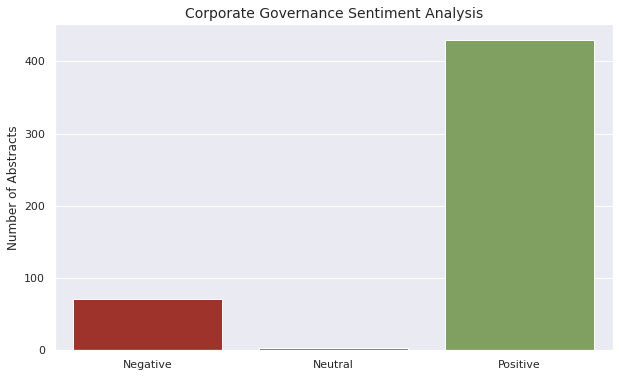

In [31]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
labels = df_tb.groupby("Pol-Category").count().index.values
values = df_tb.groupby("Pol-Category").size().values

# Setup figure layout
sns.set_style("darkgrid")
sns.set_context("notebook")
colors = ["#B02318", "#757171", "#7EAB55"]
customPalette = sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))

# Plot Barplot
sentiment_plot = sns.barplot(x = labels, y = values)
plt.title("Corporate Governance Sentiment Analysis", size = 14)
plt.ylabel("Number of Abstracts")
plt.show()


### 2c) Visualizing Subjectivity vs. Polarity
 

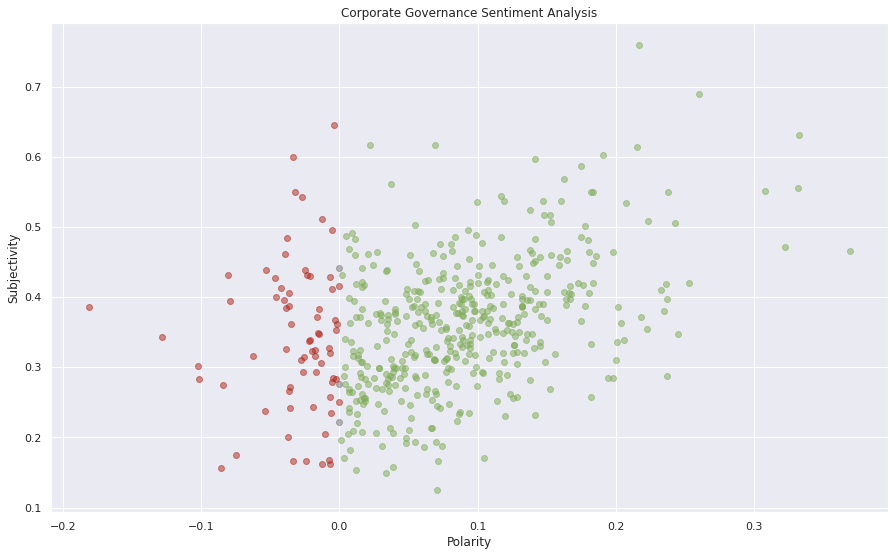

In [36]:
# Setup figure layout
plt.figure(figsize = (15, 9))

# Layer scatterplots based on "Category" on top of each other
for index, row in df_tb.iterrows():
    if row["Pol-Category"] == "Positive":
        scatt_plot = plt.scatter(row["Polarity"], row["Subjectivity"], color = "#7EAB55", alpha = 0.5)
    elif row["Pol-Category"] == "Negative":
       scatt_plot = plt.scatter(row["Polarity"], row["Subjectivity"], color = "#B02318", alpha = 0.5)
    elif row["Pol-Category"] == "Neutral":
        scatt_plot = plt.scatter(row["Polarity"], row["Subjectivity"], color = "#757171", alpha = 0.5)

# Add annotations
plt.title("Corporate Governance Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

# add legend
plt.show()


We see that most of the articles derive recommended actions that might enhance and have a positive impact on corporate governance performance and their role as guardians of compliance and reasonable risk taking.

However, we also see that most articles vary between a subjectivity-corridor of 0.3 and 0.4. Considering the scientific context, this subjectivity may be due to researchers' intensions such as delivering results in favor of a sponsors' industry.

Doing sentiment analysis of the abstracts enabled us to calculate numerical values of subjectivity and polarity.


### 2d) Polarity - Time Series Analysis
In this subanalysis, we want to get some insights of positive / negative papers and how they develop over time.

Therefore we want to depict the ratio of positive and negative abstracts of corporate governance research from 2011 to 2020. Did positive / negativ abstracts increase or dicrease over time?


**Build a Pivot-Table**

In [45]:
# Create a pivot table
df_tb_pivot = pd.pivot_table(df_tb, 
                             values = ["Pol-Category"], 
                             index = df_tb["Year"], 
                             columns = df_tb["Pol-Category"], 
                             aggfunc = "count")

# View the df_tb_pivot
df_tb_pivot

Pol-Category                 
Pol-Category     Negative Neutral Positive
Year                                      
2011                 10.0     NaN     40.0
2012                  7.0     1.0     42.0
2013                  5.0     NaN     46.0
2014                  5.0     NaN     41.0
2015                  8.0     NaN     34.0
2016                  5.0     NaN     34.0
2017                  9.0     1.0     42.0
2018                  5.0     1.0     41.0
2019                  7.0     NaN     41.0
2020                 10.0     NaN     69.0

**Create manually cleaned dataframe**

In [48]:
# Build the dataframe
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
pol_pos = [40, 42, 46, 41, 34, 34, 42, 41, 41, 69]
pol_neg = [10, 7, 5, 5, 8, 5, 9, 5, 7, 10]
df_tb_posneg = pd.DataFrame({"Positive Polarity" : pol_pos, "Negative Polarity" : pol_neg}, index = year)

# View first rows
df_tb_posneg.head()

,Positive Polarity,Negative Polarity
2011,40,10
2012,42,7
2013,46,5
2014,41,5
2015,34,8


**d) Visualization**

<Figure size 1080x648 with 0 Axes>

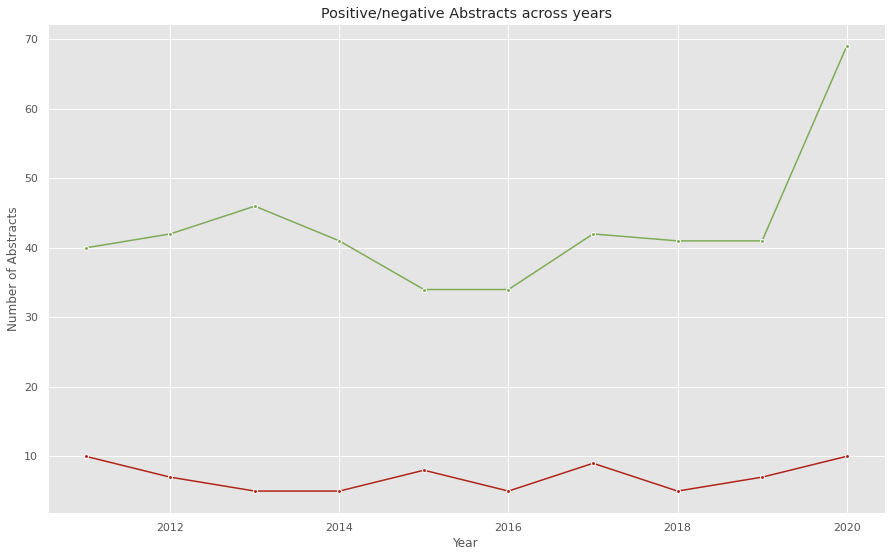

In [71]:
# Import library
import matplotlib.pyplot as plt

# Setup figure layout
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))

fig, ax = plt.subplots(figsize = (15, 9))

# Plot lineplot
ax.plot(df_tb_posneg.index, df_tb_posneg["Positive Polarity"], marker = "o", markeredgecolor = "white", markersize = 4,
         color = "#7EAB55")
ax.plot(df_tb_posneg.index, df_tb_posneg["Negative Polarity"], marker = "o", markeredgecolor = "white", markersize = 4,
         color = "#B02318")

# Add annotations
plt.ylabel("Number of Abstracts")
plt.xlabel("Year")
plt.title("Positive/negative Abstracts across years")

# Show plot
plt.show()

**Barplot (single y-axis)** shows negative and positive Polarity from 2011 to 2020:
- Positive polarity seems to have slightly increased since 2011.
- In 2016 Positive Polarity decreased by approx. 25%.
- Negative Polarity remained relatively stable.

**e) Visualize data using twin y-axes**

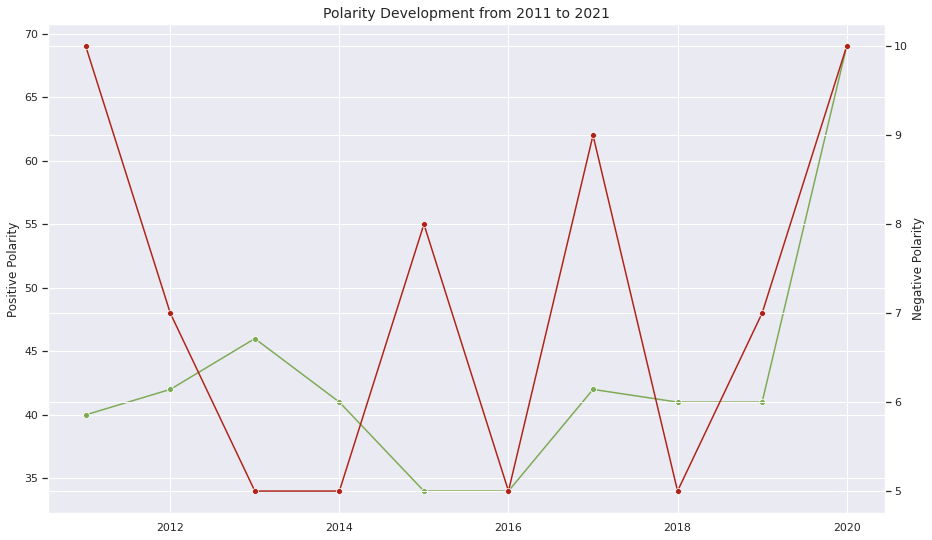

In [76]:
# Setup figure layout
sns.set_style("darkgrid")
sns.set_palette(palette = ["#7EAB55", "#B02318"] , n_colors = 2)
sns.set_context("notebook")
plt.figure(figsize = (15,9))

sns.lineplot(data = df_tb_posneg["Positive Polarity"], color = "#7EAB55", marker = "o")
ax2 = plt.twinx()
sns.lineplot(data = df_tb_posneg["Negative Polarity"], color = "#B02318", marker = "o", dashes = True, ax = ax2)

# Label axes and plot
plt.title("Polarity Development from 2011 to 2021", size = 14)
plt.xlabel("Year")
plt.ylabel("Negative Polarity")

# Plot 
plt.show()

## 3) Sentiment Analysis using VADER

- We'll use **NLTK's VADER** or **Valance Aware Dictionary and sEntiment analyzeR** as it has a pretrained sentiment analysis model in it. 
- VADER works by analyzing each word in a piece of text and giving it a sentiment score.

______________________________

#### VADER-Technicalities

**VADER (Valence Aware Dictionary for Sentiment Reasoning)** is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 

VADER is used to quantify how much of positive or negative emotion the text has and also the intensity of emotion.

- To start sentiment analysis, you import the **`SentimentIntensityAnalyzer`** class from the nltk sentiment vader module. 
- And then instantiate an instance of **`SentimentIntensityAnalyzer`** and save it to the commonly named variable sid. 
- You can then find the sentiment scores of a piece of text by calling polarity scores on sid and passing it a string. 
- Running the function will return four values, **`neg`** for negative, **`neu`** for neutral, **`pos`** for positive and compound as an overall. 
- The more negative a piece of text is, the higher the negative score will be and the same goes for the positive score if the text is positive. 
- If it's in the middle, neutral will be higher.
- The **compound score** is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more **compound** score closer to +1, the higher the positivity of the text.

### 3a) Data Preprocessing

In [77]:
# Import pandas library
import pandas as pd

# Import dataset
df_vader = pd.read_csv("/content/drive/MyDrive/01_Promotion/01_ZCG_Veröffentlichung/Rohdaten_0603.csv", sep = ";", 
                       index_col = 0, error_bad_lines=False)
# View first rows
df_vader.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Journal,Title,Year,Abstract
No.,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a..."
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...


In [78]:
# Import libraries and packages
import nltk
nltk.download("punkt")
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instatiate SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Compute "Polarity" using the sid
df_vader["Polarity"] = [sid.polarity_scores(abstract) for abstract in df_vader["Abstract"]]

# View first rows
df_vader.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Journal,Title,Year,Abstract,Polarity
No.,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,"{'neg': 0.015, 'neu': 0.948, 'pos': 0.037, 'co..."
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...","{'neg': 0.052, 'neu': 0.894, 'pos': 0.054, 'co..."
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,"{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp..."
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,"{'neg': 0.061, 'neu': 0.898, 'pos': 0.041, 'co..."
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,"{'neg': 0.101, 'neu': 0.88, 'pos': 0.019, 'com..."
6,Journal of Economics and Finance,An empirical analysis of the impact of large c...,2015,Using a panel of publicly traded companies wit...,"{'neg': 0.101, 'neu': 0.824, 'pos': 0.075, 'co..."
7,Journal of Economics and Finance,Managerial optimism CEO retention and corporat...,2020,Using data on 601 firms in the United States f...,"{'neg': 0.099, 'neu': 0.701, 'pos': 0.201, 'co..."
8,Journal of Economics and Finance,CEO ability and firm performance: Stock market...,2018,Does the stock market and job market evaluate ...,"{'neg': 0.039, 'neu': 0.85, 'pos': 0.112, 'com..."
9,Journal of Economics and Finance,Corporate governance and employee treatment: e...,2020,In this study we use a unique hand-collected d...,"{'neg': 0.081, 'neu': 0.846, 'pos': 0.073, 'co..."


**Deconstruct Polarity-dictionary**

Split the Polarity column into separate columns with pandas. See the following question on stackoverflow
https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas

In [79]:
# Create df from Polarity column
df_vader_polarity = pd.DataFrame(df_vader["Polarity"].tolist())

# View created polarity df
df_vader_polarity

,neg,neu,pos,compound
0,0.015,0.948,0.037,0.4939
1,0.052,0.894,0.054,-0.3869
2,0.000,0.889,0.111,0.9022
3,0.061,0.898,0.041,-0.5859
4,0.101,0.880,0.019,-0.8225
...,...,...,...,...
525,0.000,0.981,0.019,0.0772
526,0.016,0.794,0.190,0.9668
527,0.017,0.871,0.112,0.9460
528,0.000,0.975,0.025,0.3400


**Mergin the Dataframes**

In [80]:
# Reset index
df_vader = df_vader.reset_index()

# Join the dataframes
df_vader = df_vader.join(df_vader_polarity, how = "right")

#df_vader = df_vader.drop("Polarity")
df_vader.head(10)

,No.,Journal,Title,Year,Abstract,Polarity,neg,neu,pos,compound
0,1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,"{'neg': 0.015, 'neu': 0.948, 'pos': 0.037, 'co...",0.015,0.948,0.037,0.4939
1,2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...","{'neg': 0.052, 'neu': 0.894, 'pos': 0.054, 'co...",0.052,0.894,0.054,-0.3869
2,3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,"{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",0.000,0.889,0.111,0.9022
3,4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,"{'neg': 0.061, 'neu': 0.898, 'pos': 0.041, 'co...",0.061,0.898,0.041,-0.5859
4,5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,"{'neg': 0.101, 'neu': 0.88, 'pos': 0.019, 'com...",0.101,0.880,0.019,-0.8225
5,6,Journal of Economics and Finance,An empirical analysis of the impact of large c...,2015,Using a panel of publicly traded companies wit...,"{'neg': 0.101, 'neu': 0.824, 'pos': 0.075, 'co...",0.101,0.824,0.075,-0.4215
6,7,Journal of Economics and Finance,Managerial optimism CEO retention and corporat...,2020,Using data on 601 firms in the United States f...,"{'neg': 0.099, 'neu': 0.701, 'pos': 0.201, 'co...",0.099,0.701,0.201,0.9623
7,8,Journal of Economics and Finance,CEO ability and firm performance: Stock market...,2018,Does the stock market and job market evaluate ...,"{'neg': 0.039, 'neu': 0.85, 'pos': 0.112, 'com...",0.039,0.850,0.112,0.9459
8,9,Journal of Economics and Finance,Corporate governance and employee treatment: e...,2020,In this study we use a unique hand-collected d...,"{'neg': 0.081, 'neu': 0.846, 'pos': 0.073, 'co...",0.081,0.846,0.073,0.2263
9,10,Journal of Economics and Finance,Managerial hedging ability and firm risk,2012,Modern portfolio theory suggests that undivers...,"{'neg': 0.142, 'neu': 0.715, 'pos': 0.144, 'co...",0.142,0.715,0.144,-0.4033


**Drop the original "Polarity"-column**

In [ ]:
# Drop "Polarity"-column
df_vader = df_vader.drop(["Polarity"], axis = 1)

# View first rows
df_vader.head(10)

,No.,Journal,Title,Year,Abstract,neg,neu,pos,compound
0,1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,0.015,0.948,0.037,0.4939
1,2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...",0.052,0.894,0.054,-0.3869
2,3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,0.000,0.889,0.111,0.9022
3,4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,0.061,0.898,0.041,-0.5859
4,5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,0.101,0.880,0.019,-0.8225
5,6,Journal of Economics and Finance,An empirical analysis of the impact of large c...,2015,Using a panel of publicly traded companies wit...,0.101,0.824,0.075,-0.4215
6,7,Journal of Economics and Finance,Managerial optimism CEO retention and corporat...,2020,Using data on 601 firms in the United States f...,0.099,0.701,0.201,0.9623
7,8,Journal of Economics and Finance,CEO ability and firm performance: Stock market...,2018,Does the stock market and job market evaluate ...,0.039,0.850,0.112,0.9459
8,9,Journal of Economics and Finance,Corporate governance and employee treatment: e...,2020,In this study we use a unique hand-collected d...,0.081,0.846,0.073,0.2263
9,10,Journal of Economics and Finance,Managerial hedging ability and firm risk,2012,Modern portfolio theory suggests that undivers...,0.142,0.715,0.144,-0.4033


**Define function to categorize compound value**

In [81]:
def getVaderAnalysis(compound):
    if compound < -0.1:
        return "Negative"
    elif compound > 0.1:
        return "Positive"
    else:
        return "Neutral"

In [83]:
# Apply function to each compound value
df_vader["Vader_polarity"] = [getVaderAnalysis(comp) for comp in df_vader["compound"]]

# View first rows
df_vader.head()

,No.,Journal,Title,Year,Abstract,Polarity,neg,neu,pos,compound,Vader_polarity
0,1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,"{'neg': 0.015, 'neu': 0.948, 'pos': 0.037, 'co...",0.015,0.948,0.037,0.4939,Positive
1,2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...","{'neg': 0.052, 'neu': 0.894, 'pos': 0.054, 'co...",0.052,0.894,0.054,-0.3869,Negative
2,3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,"{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",0.000,0.889,0.111,0.9022,Positive
3,4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,"{'neg': 0.061, 'neu': 0.898, 'pos': 0.041, 'co...",0.061,0.898,0.041,-0.5859,Negative
4,5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,"{'neg': 0.101, 'neu': 0.88, 'pos': 0.019, 'com...",0.101,0.880,0.019,-0.8225,Negative


In [86]:
# Calculate Percentage of positive Abstracts
positive_vader = df_vader[df_vader["Vader_polarity"] == "Positive"]

# Print(positive.head())
print(f"{round(positive_vader.shape[0]/(df_vader.shape[0])*100, 2)} % of positive abstracts")

# Calculate Percentage of negative Abstracts
negative_vader = df_vader[df_vader["Vader_polarity"] == "Negative"]

print(f"{round(negative_vader.shape[0]/(df_vader.shape[0])*100, 2)} % of negative abstracts")

# Calculate Percentage of neutral Abstracts
neutral_vader = df_vader[df_vader["Vader_polarity"] == "Neutral"]

print(f"{round(neutral_vader.shape[0]/(df_vader.shape[0])*100, 2)} % of neutral abstracts")

79.62 % of positive abstracts
16.6 % of negative abstracts
3.77 % of neutral abstracts


Using the VADER package, we achieve slightly different distribution for the three categories. However, majority  of abstracts are positively characterized. The main message remains important.

### 3b) Visualizing Polarity

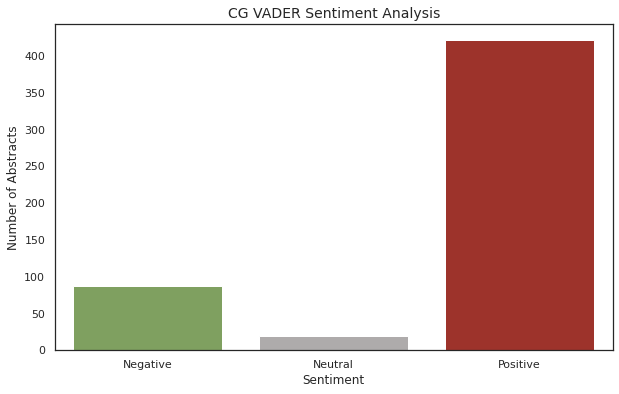

In [98]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Create plot input data
labels = df_vader.groupby("Vader_polarity").count().index.values
values = df_vader.groupby("Vader_polarity").size().values

# Setup figure layout
sns.set_style("white")
sns.set_context("notebook")
colors = ["#7EAB55", "#AEABAB", "#B02318"]
customPalette = sns.set_palette(colors)
plt.figure(figsize = (10,6))

# Visualize Bar plot
sns.barplot(x = labels, y = values)

# Add annotations
plt.title("CG VADER Sentiment Analysis", fontsize = 14)
plt.xlabel("Sentiment", fontsize = 12)
plt.ylabel("Number of Abstracts", fontsize = 12)
plt.show()


### 3c) Scatterplot: Compound vs. Intensity

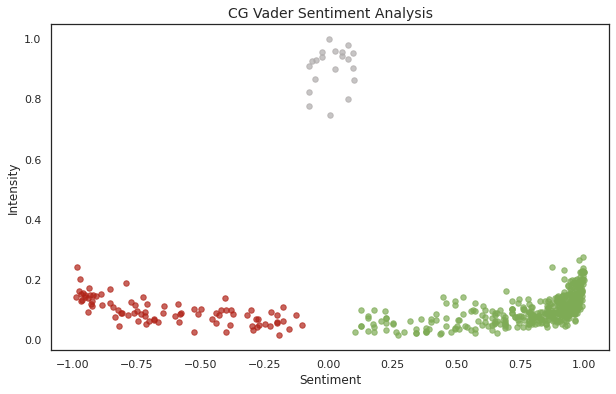

In [104]:
# Setup figure layout
plt.figure(figsize = (10, 6))

# Figure layering based on polarity category
for index, row in df_vader.iterrows():
    if row["Vader_polarity"] == "Positive":
        scatt_plot = plt.scatter(row["compound"], row["pos"], color = "#7EAB55", alpha = 0.7, s = 30)
       
    elif row["Vader_polarity"] == "Negative":
        scatt_plot = plt.scatter(row["compound"], row["neg"], color = "#B02318", alpha = 0.7, s = 30)
       
    elif row["Vader_polarity"] == "Neutral":
        scatt_plot = plt.scatter(row["compound"], row["neu"], color = "#AEABAB", alpha = 0.7, s = 30)
      
# Add Annotations
plt.title("CG Vader Sentiment Analysis", fontsize = 14)
plt.xlabel("Sentiment", fontsize = 12)
plt.ylabel("Intensity", fontsize = 12)

# Show
plt.show()

### 3d) Deep-Dive Analysis 

- Verify whether categorization as pos/neg/neu makes sense
- http://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/

This subanalysis pursues to qualitatively analyse the classification of abstracts.



**Neutral Abstracts**

In [ ]:
# Set display option
pd.set_option("display.max_columns", 500)

# Subset df for neutral compound values
df_vader_neutral = df_vader[df_vader["compound"] == 0]

# View neutral rows
df_vader_neutral

,No.,Journal,Title,Year,Abstract,neg,neu,pos,compound,Vader_polarity
24,25,International Journal of Disclosure And Govern...,Influence of board of directors on firm perfor...,2015,This article analyses how board structure can ...,0.0,1.0,0.0,0.0,Neutral


**Positive Abstracts**

In [ ]:
# Subset df and sort in descending order
df_vader_positive = df_vader[df_vader["compound"] > 0].sort_values(by = "compound", ascending = False)

# View the abstracts with the highest compound values
df_vader_positive.head(20)

,No.,Journal,Title,Year,Abstract,neg,neu,pos,compound,Vader_polarity
254,255,Corporate Governance: An International Review,"CEO Personal Wealth, Equity Incentives and Fir...",2012,"In this paper, we explore the determinants and...",0.011,0.788,0.201,0.9971,Positive
259,260,Corporate Governance: An International Review,The use of nonfinancial performance measures i...,2019,"In this study, we explore the relationship bet...",0.031,0.744,0.225,0.9967,Positive
283,284,Corporate Governance: An International Review,Do talented managers invest more efficiently? ...,2018,The main objective of this paper is to examine...,0.017,0.757,0.226,0.9966,Positive
514,515,Journal of Business Economics and Management,Corporate Governance and Business Performance:...,2013,Our finding contributes towards the understand...,0.000,0.798,0.202,0.9956,Positive
21,22,International Journal of Disclosure And Govern...,Improving corporate performance by enhancing t...,2015,Board performance research conducted over the ...,0.050,0.720,0.229,0.9953,Positive
449,450,Journal of Management,CEO Awards and Financial Misconduct,2020,We propose that CEOs are more likely to engage...,0.013,0.746,0.241,0.9950,Positive
84,85,Journal of Management and Governance,Board characteristics and the value relevance ...,2017,This study investigates whether board characte...,0.010,0.712,0.278,0.9942,Positive
30,31,International Journal of Disclosure And Govern...,The effect of voluntary disclosures and corpor...,2020,This study examines how voluntary disclosures ...,0.009,0.804,0.187,0.9937,Positive
167,168,Corporate Governance: An International Review,Governance Quality in a “Comply or Explain” Go...,2014,Do firms take advantage of the flexibility of ...,0.019,0.767,0.214,0.9934,Positive
249,250,Corporate Governance: An International Review,Friendly compensation committees and pay‐for‐l...,2020,The study examines whether the presence of soc...,0.081,0.695,0.225,0.9928,Positive


**Top 20 of Positive observations:**
- 1 Occurence of "financial misconduct" -> must be classified as negative abstract
- CEO compensation & business performance are central topics
- 2 abstracts consider investments and shareholder value against the background of corporate governance

**Low 20 of Positive observations:**
- Sometimes misclassified negative abstracts
- To be precise, we must re-classify abstracts No. 152 / 127 / 333 /341 to "Negative"

A generally new demarcation between positive/neutral/negative is to be refrained from, since no clearly recognizable boundary between negative-afflicted topics and positive-afflicted topics is discernible.

Despite the above declaration, we adjust polarity for false positive abstracts to see how the visualization changes.

In [ ]:
# Change polarity of false positive abstracts
df_vader.iloc[151, df_vader.columns.get_loc("Vader_polarity")] = "Negative"
df_vader.iloc[127, df_vader.columns.get_loc("Vader_polarity")] = "Negative"
df_vader.iloc[333, df_vader.columns.get_loc("Vader_polarity")] = "Negative"
df_vader.iloc[341, df_vader.columns.get_loc("Vader_polarity")] = "Negative"


**Negative Abstracts**

In [ ]:
# Subset df and sort in descending order
df_vader_negative = df_vader[df_vader["compound"] < 0].sort_values(by = "compound", ascending = False)

# View the top 20 abstracts with the lowest compound value
df_vader_negative.head(20)

,No.,Journal,Title,Year,Abstract,neg,neu,pos,compound,Vader_polarity
325,326,European Management Review,Gender Quotas on Corporate Boards: Similaritie...,2020,"In this article, the use of gender quotas to s...",0.019,0.956,0.025,-0.0258,Neutral
511,512,International Studies of Management & Organiza...,"Context, Behavior, and Evolution: Challenges i...",2014,"In this article, we present an overview of emp...",0.035,0.939,0.026,-0.0276,Neutral
317,318,British Journal of Management,Do Chief Executives’ Traits Affect the Financi...,2017,We examine the effects of four key dimensions ...,0.041,0.931,0.028,-0.0495,Neutral
521,522,Journal of Business Economics and Management,Ownership Structure and Board Effectiveness as...,2011,This study analyzes the influence of ownership...,0.086,0.867,0.047,-0.0534,Neutral
492,493,Cogent Business & Management,Corporate Governance Reforms in Japan: Instill...,2017,This paper analyzes recent transformations in ...,0.038,0.926,0.036,-0.0644,Neutral
65,66,Journal of Management and Governance,The influence of board experience on firm perf...,2020,This paper examines how company board characte...,0.043,0.911,0.047,-0.0772,Neutral
490,491,BRQ Business Research Quarterly,Board Composition and Performance in Spanish N...,2020,This study analyzes the effect that certain ch...,0.089,0.825,0.086,-0.0772,Neutral
454,455,Journal of Management,CEO Gender-Based Termination Concerns: Evidenc...,2019,We theorize that female candidates considering...,0.112,0.779,0.109,-0.0772,Neutral
477,478,BRQ Business Research Quarterly,Reducing Risk in the Emerging Markets: Does En...,2020,This study examines emerging market firms that...,0.052,0.905,0.043,-0.1027,Negative
149,150,Review of Managerial Science,Executive compensation and corporate governanc...,2015,This paper examines the influence of the owner...,0.084,0.852,0.065,-0.1263,Negative


**Top 20 of Negative observation:**
- All abstracts are correctly classified

**Low 20 of Negative observation:**
- Abstracts are partly mis-classified

In [105]:
# Change polarity of mis-classified abstracts
df_vader.iloc[492, df_vader.columns.get_loc("Vader_polarity")] = "Negative"
df_vader.iloc[28, df_vader.columns.get_loc("Vader_polarity")] = "Neutral"
df_vader.iloc[500, df_vader.columns.get_loc("Vader_polarity")] = "Neutral"

**Update des Scatter Plots**

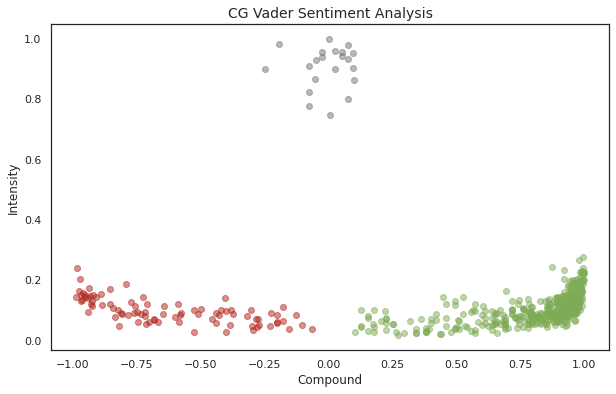

In [107]:
# Setup figure layout
plt.figure(figsize = (10, 6))

# Figure layering based on polarity category
for index, row in df_vader.iterrows():
    if row["Vader_polarity"] == "Positive":
        scatt_plot = plt.scatter(row["compound"], row["pos"], color = "#7EAB55", alpha = 0.5)
    elif row["Vader_polarity"] == 'Negative':
        scatt_plot = plt.scatter(row["compound"], row["neg"], color = "#B02318", alpha = 0.5)
    elif row["Vader_polarity"] == 'Neutral':
        scatt_plot = plt.scatter(row["compound"], row["neu"], color = "#757171", alpha = 0.5)

# Add annotations
plt.title("CG Vader Sentiment Analysis", fontsize = 14)
plt.xlabel("Compound")
plt.ylabel("Intensity")

# add legend
plt.show()

In future, we might extend this text analysis by performing a syntactic text analysis.

 Within the syntactic analysis we show similarities and thus show word usage, creating dependency trees and perform a part-of-speech analysis.